In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('titanic-dataset/train.csv')

In [3]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


    __Data Dicionary__
    Variable	Definition	Key

    survival	Survival	0 = No, 1 = Yes

    pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd

    sex	Sex	

    Age	Age in years	

    sibsp	# of siblings / spouses aboard the Titanic	

    parch	# of parents / children aboard the Titanic	

    ticket	Ticket number	

    fare	Passenger fare	

    cabin	Cabin number	

    embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.shape

(891, 12)

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The data we are working with would be a __BINARY CLASSIFICATION__ because we want to know who survives or not

In [7]:
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [8]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [9]:
# lets normalize it
df['Survived'].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

We can observe that `0.616162% survived` while `0.383838% not survived`

/home/onscript/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/onscript/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/onscript/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/onscript/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

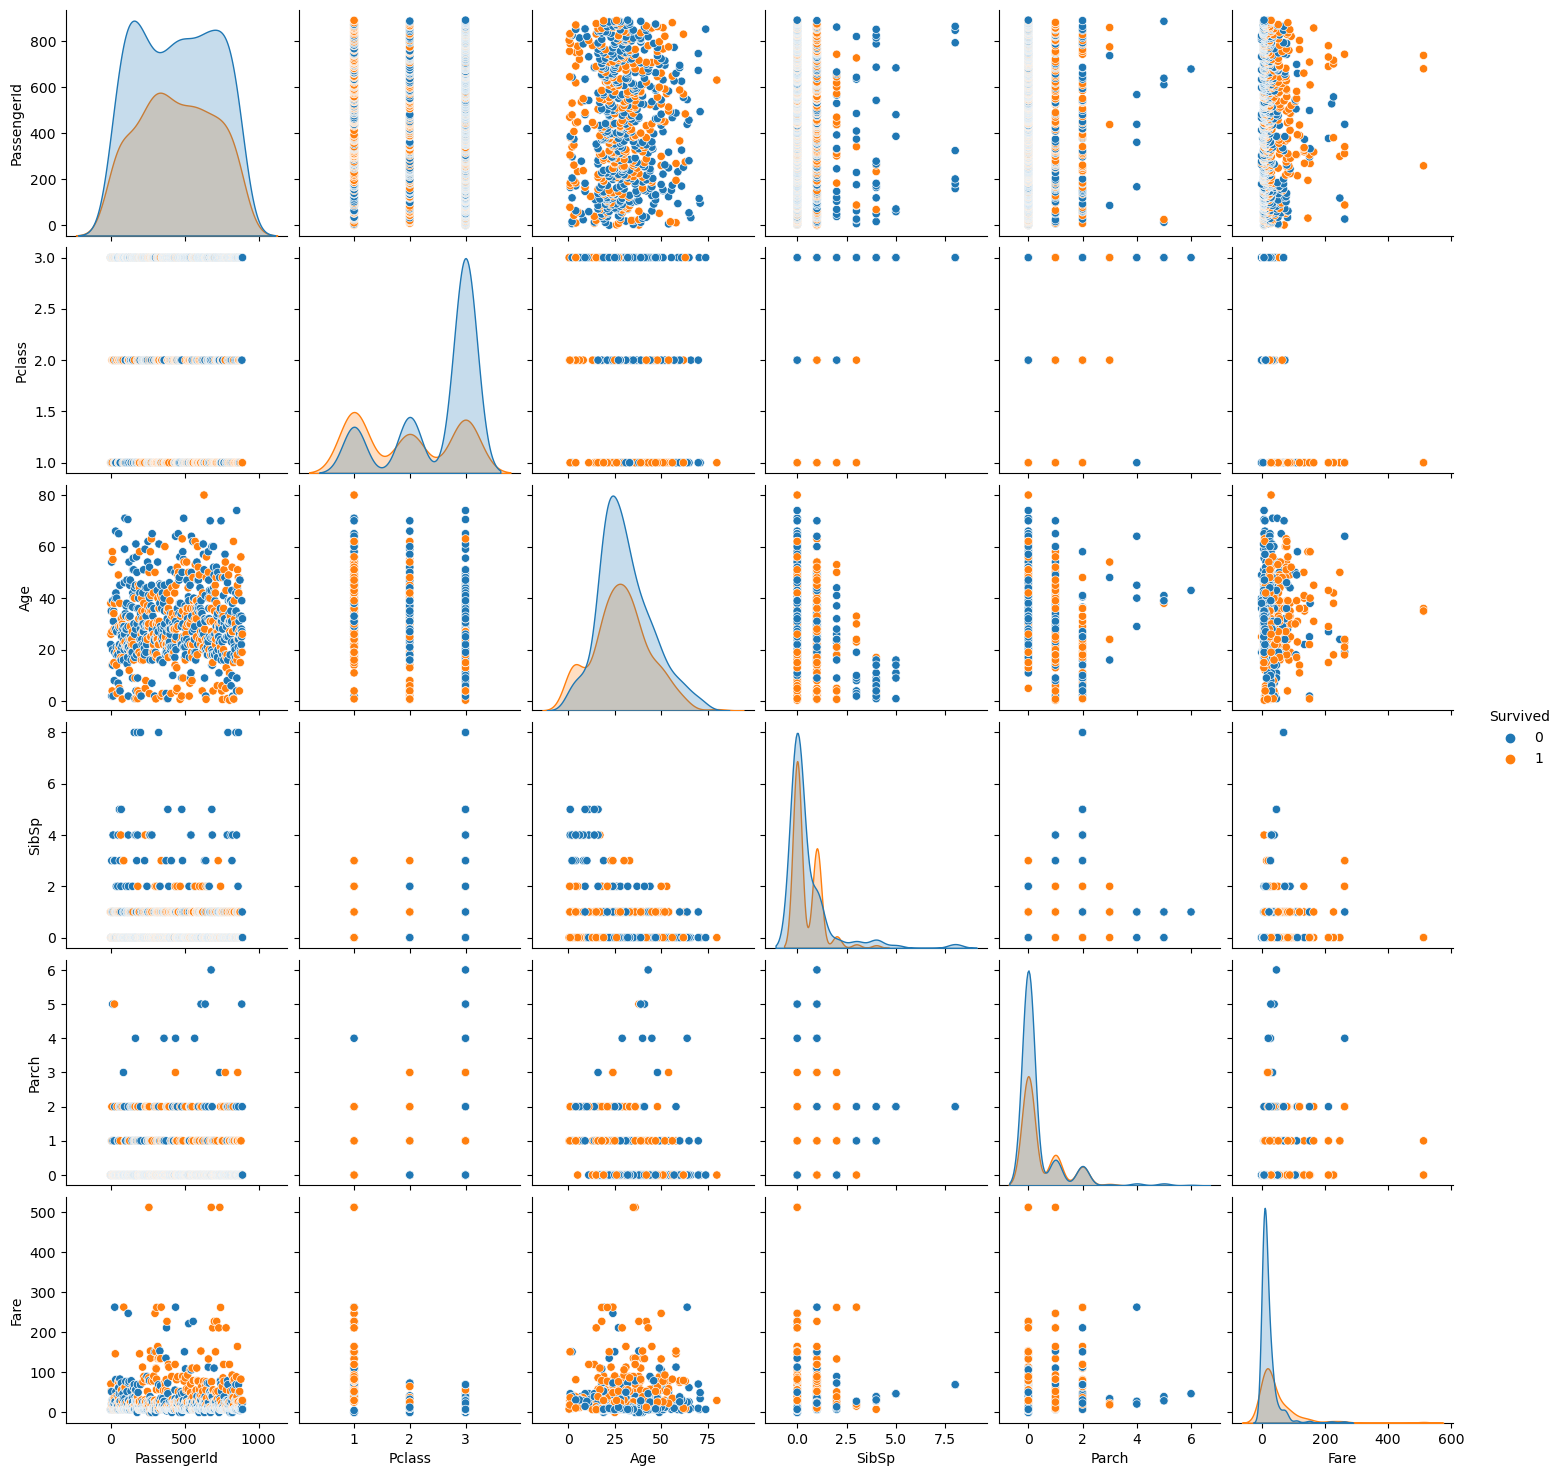

In [10]:
sns.pairplot(df, hue='Survived')

In [11]:
# missing values
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

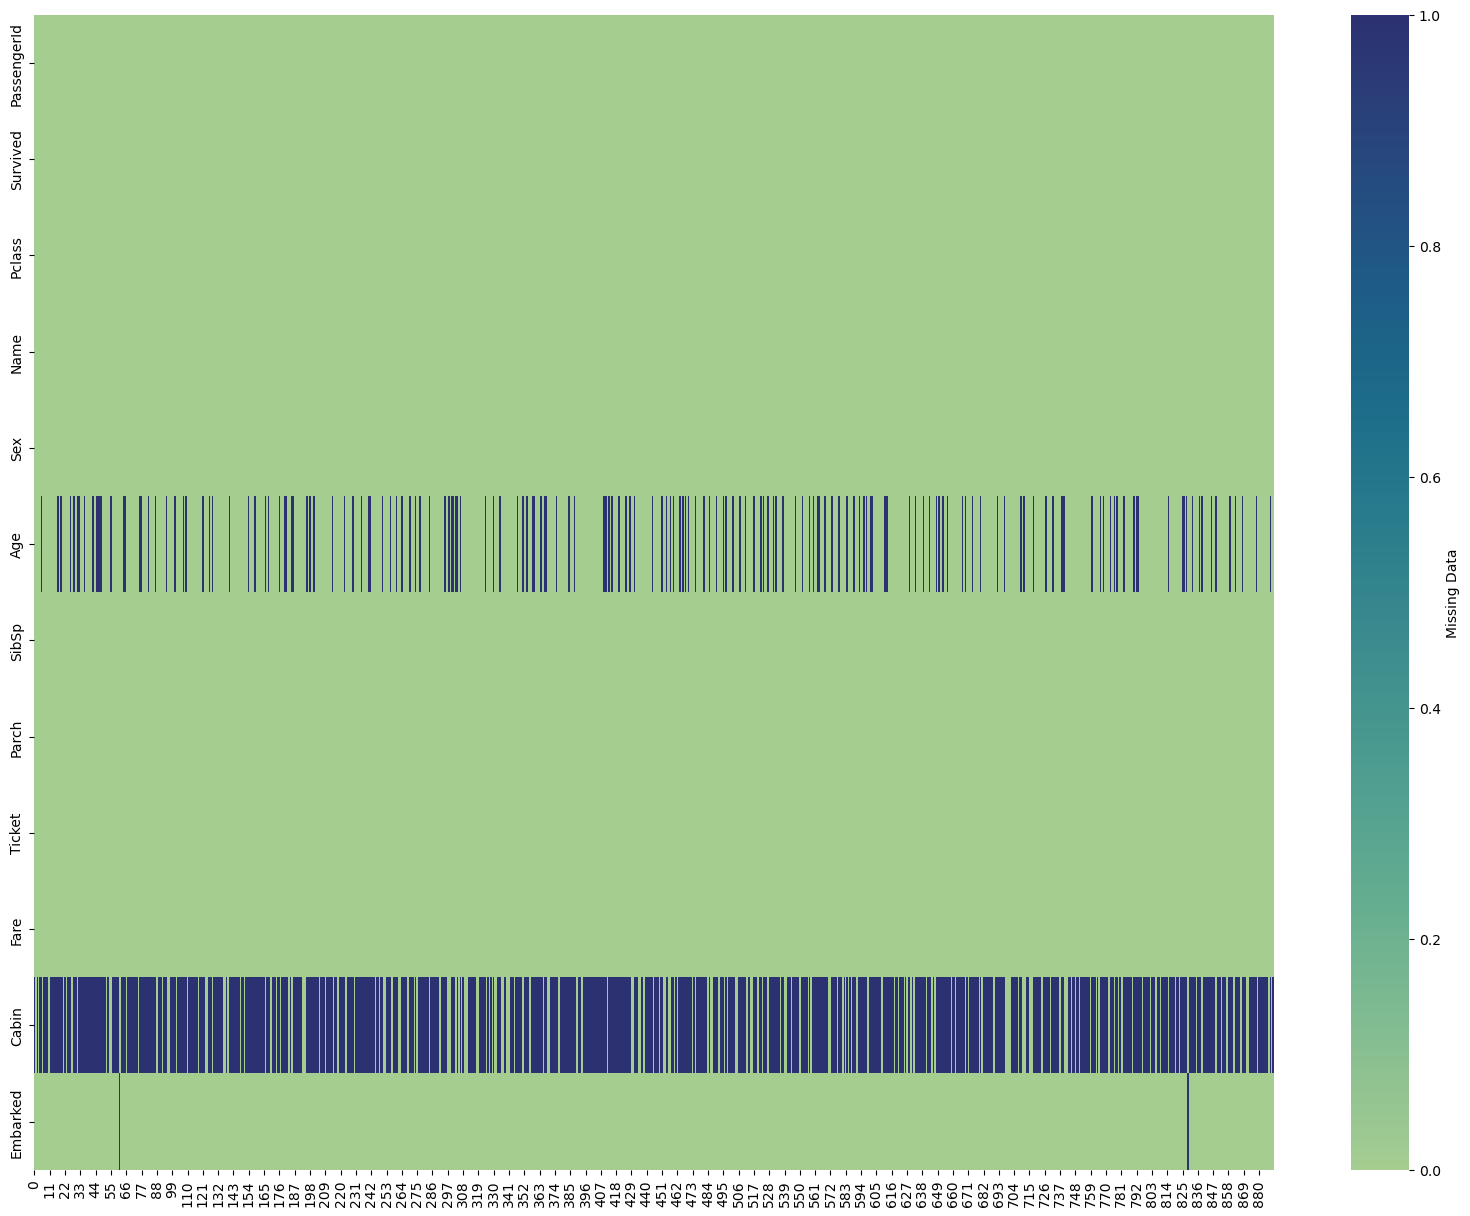

In [12]:
# heatmap
plt.figure(figsize=(20,15))
sns.heatmap(df.isna().transpose(), cmap='crest', cbar_kws={'label': 'Missing Data'})

In [13]:
# checking correlation of Ticket
df['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

Drop columns that has no use as inference for our analysis

In [14]:
df1 = df.drop(columns=['PassengerId','Ticket','Cabin'])

In [15]:
df1.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [16]:
df1.head(1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.25,S


#### EDA process

In [17]:
# Convert 'data type
df1['Survived'] = df1['Survived'].astype('category')
df1['Pclass'] = df1['Pclass'].astype('str')
df1['SibSp'] = df1['SibSp'].astype('str')

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    object  
 2   Name      891 non-null    object  
 3   Sex       891 non-null    object  
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    object  
 6   Parch     891 non-null    int64   
 7   Fare      891 non-null    float64 
 8   Embarked  889 non-null    object  
dtypes: category(1), float64(2), int64(1), object(5)
memory usage: 56.8+ KB


#### countplot of those who survived

/home/onscript/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


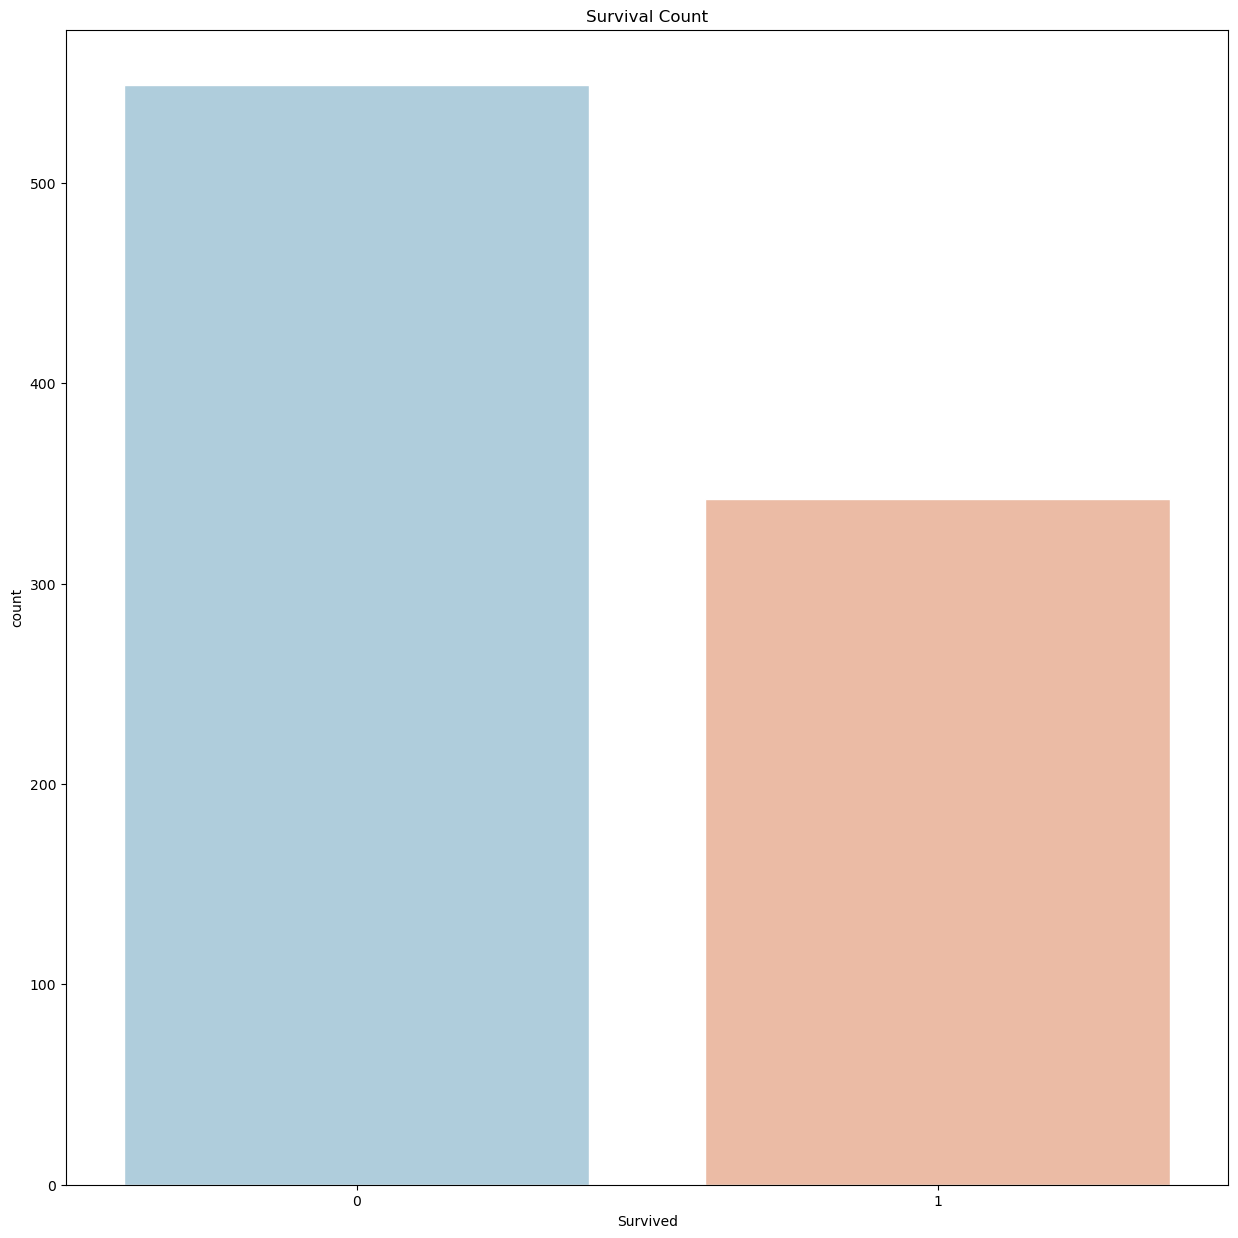

In [19]:
plt.figure(figsize=(15,15))
plt.title('Survival Count')
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=df1, palette='RdBu_r')
plt.show()

##### countplot of those who survived based on sex

/home/onscript/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/home/onscript/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


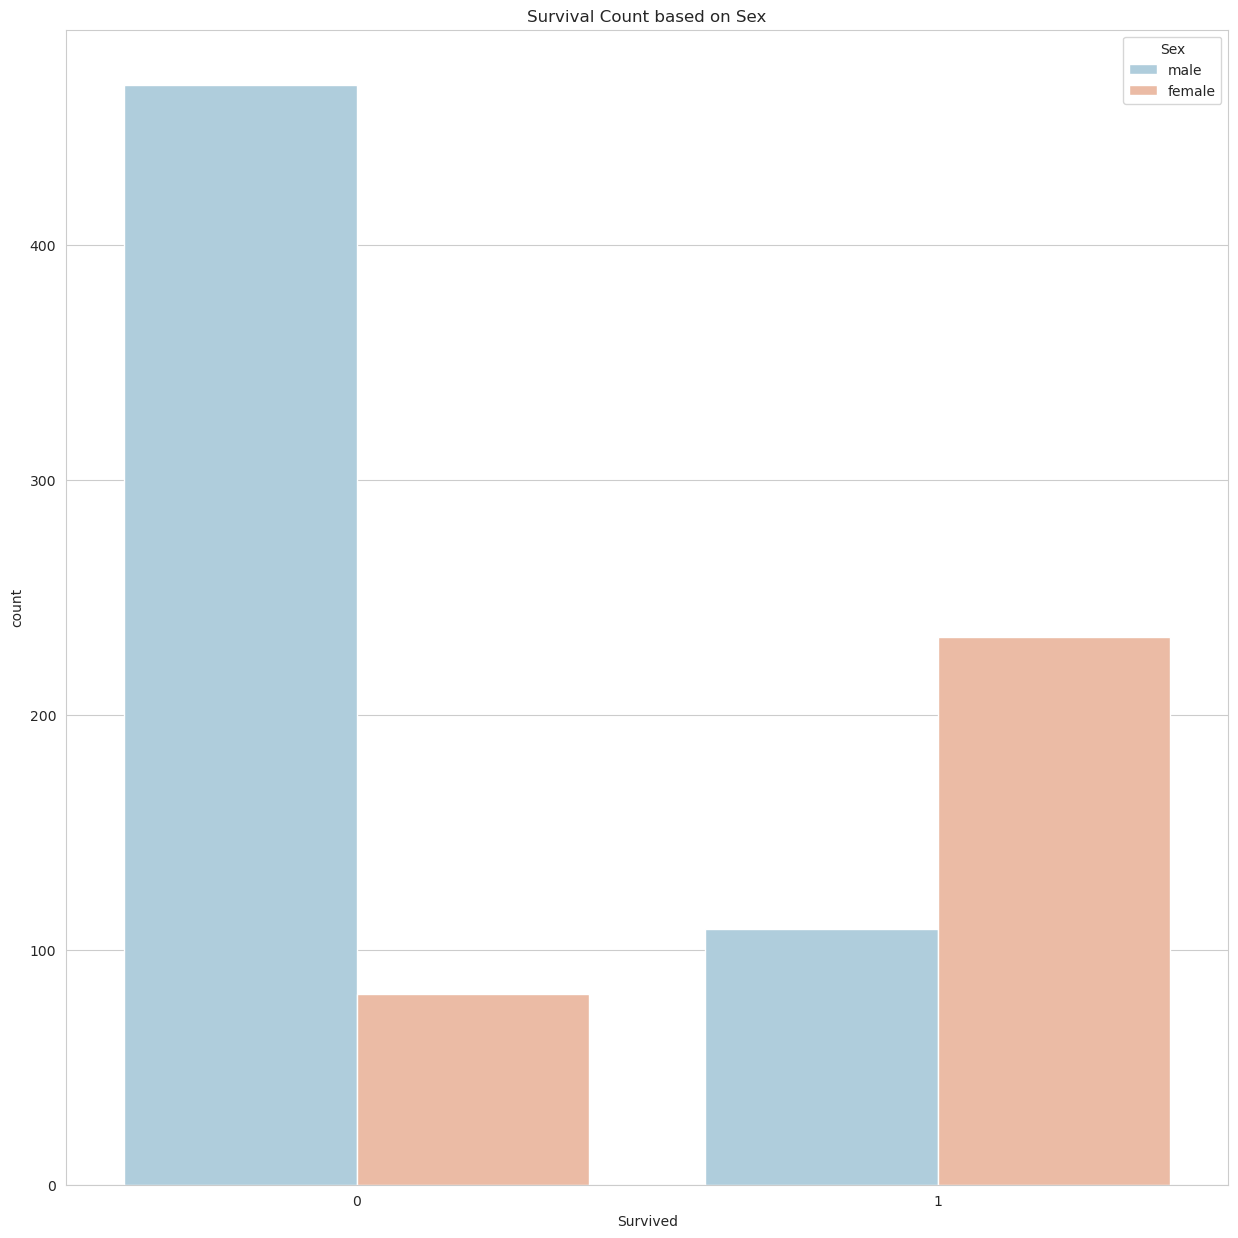

In [20]:
plt.figure(figsize=(15,15))
plt.title('Survival Count based on Sex')
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=df1, palette='RdBu_r', hue='Sex')
plt.show()

countplot of those who survived based on the pclass

In [21]:
df1[(df1['Pclass'] == '1') & (df1['Survived'] == 1)].count()

Survived    136
Pclass      136
Name        136
Sex         136
Age         122
SibSp       136
Parch       136
Fare        136
Embarked    134
dtype: int64

/home/onscript/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/home/onscript/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


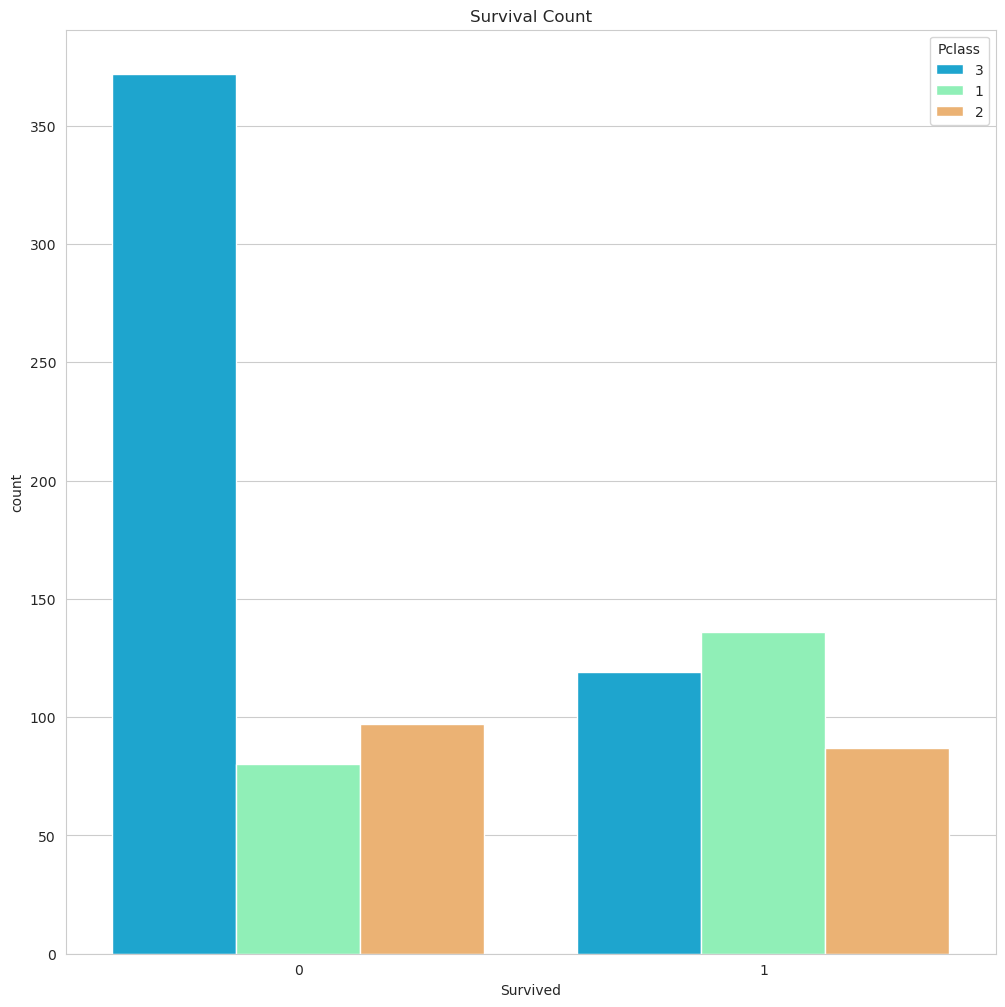

In [22]:
plt.figure(figsize=(12,12))
plt.title('Survival Count')
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=df1, palette='rainbow', hue='Pclass')
plt.show()

#### Distribution plot

Distribution of our Passengers

/home/onscript/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1500x1500 with 0 Axes>

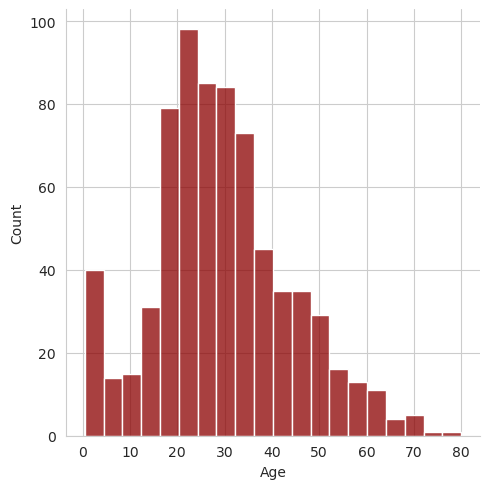

In [23]:
plt.figure(figsize=(15,15))
sns.displot(df1['Age'].dropna(), color='darkred', kde=False, bins=20)
plt.show()

#### Siblings Spouse count

In [24]:
df1['SibSp'].unique()


array(['1', '0', '3', '4', '2', '5', '8'], dtype=object)

/home/onscript/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/home/onscript/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


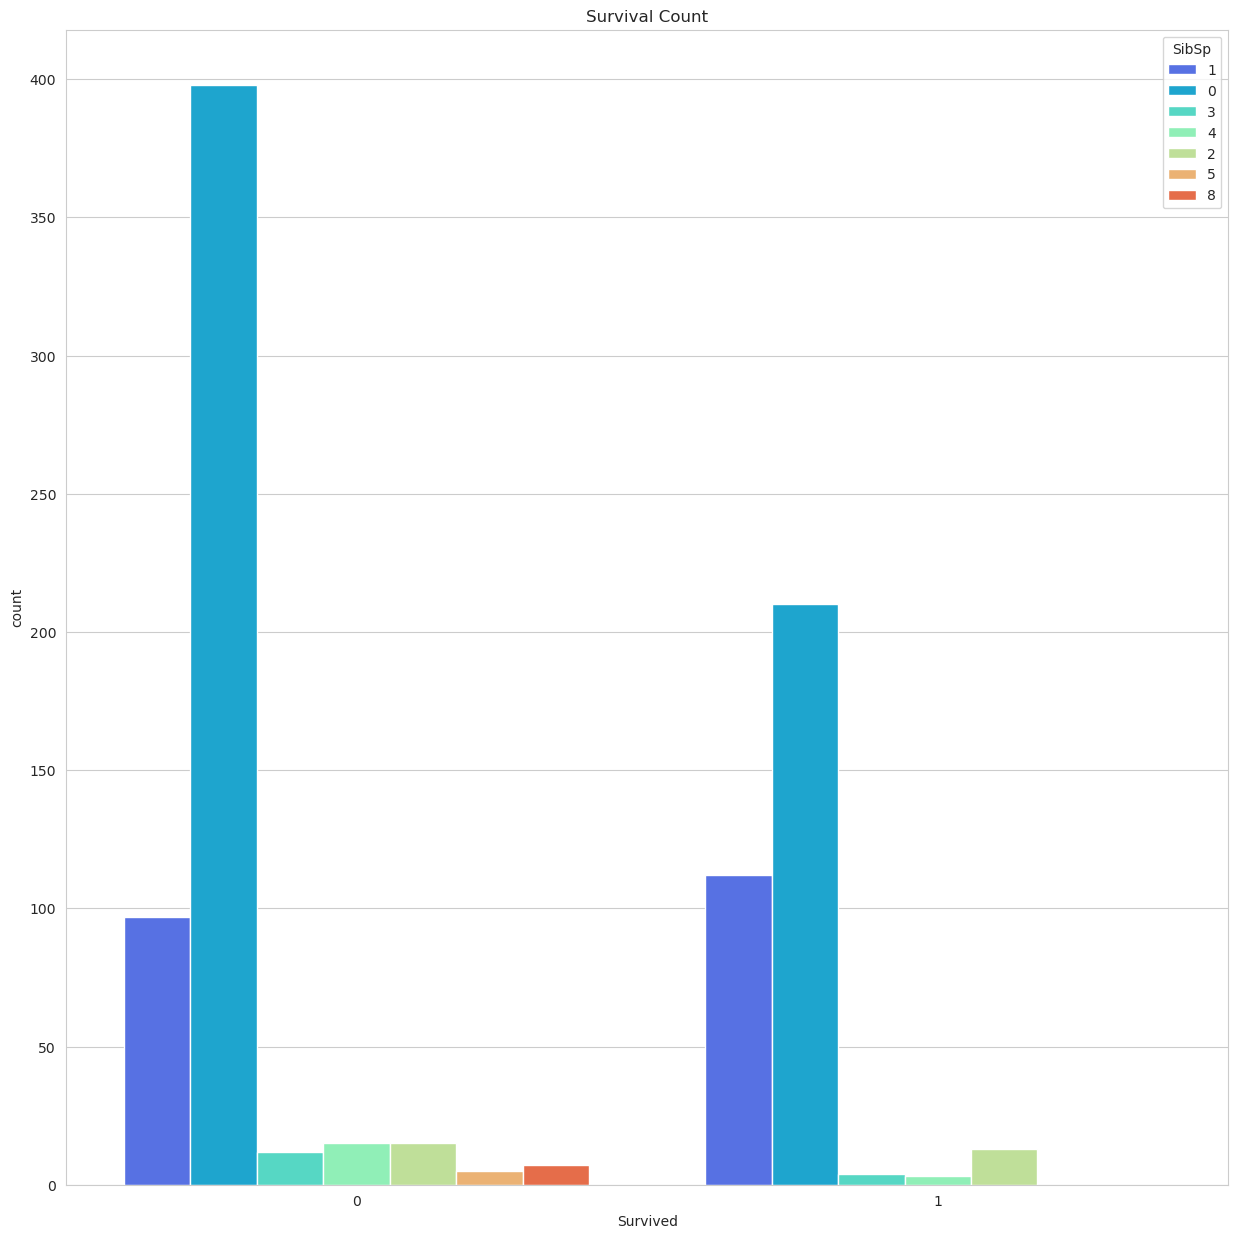

In [25]:
plt.figure(figsize=(15,15))
plt.title('Survival Count')
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=df1, palette='rainbow', hue='SibSp')
plt.show()

<Axes: >

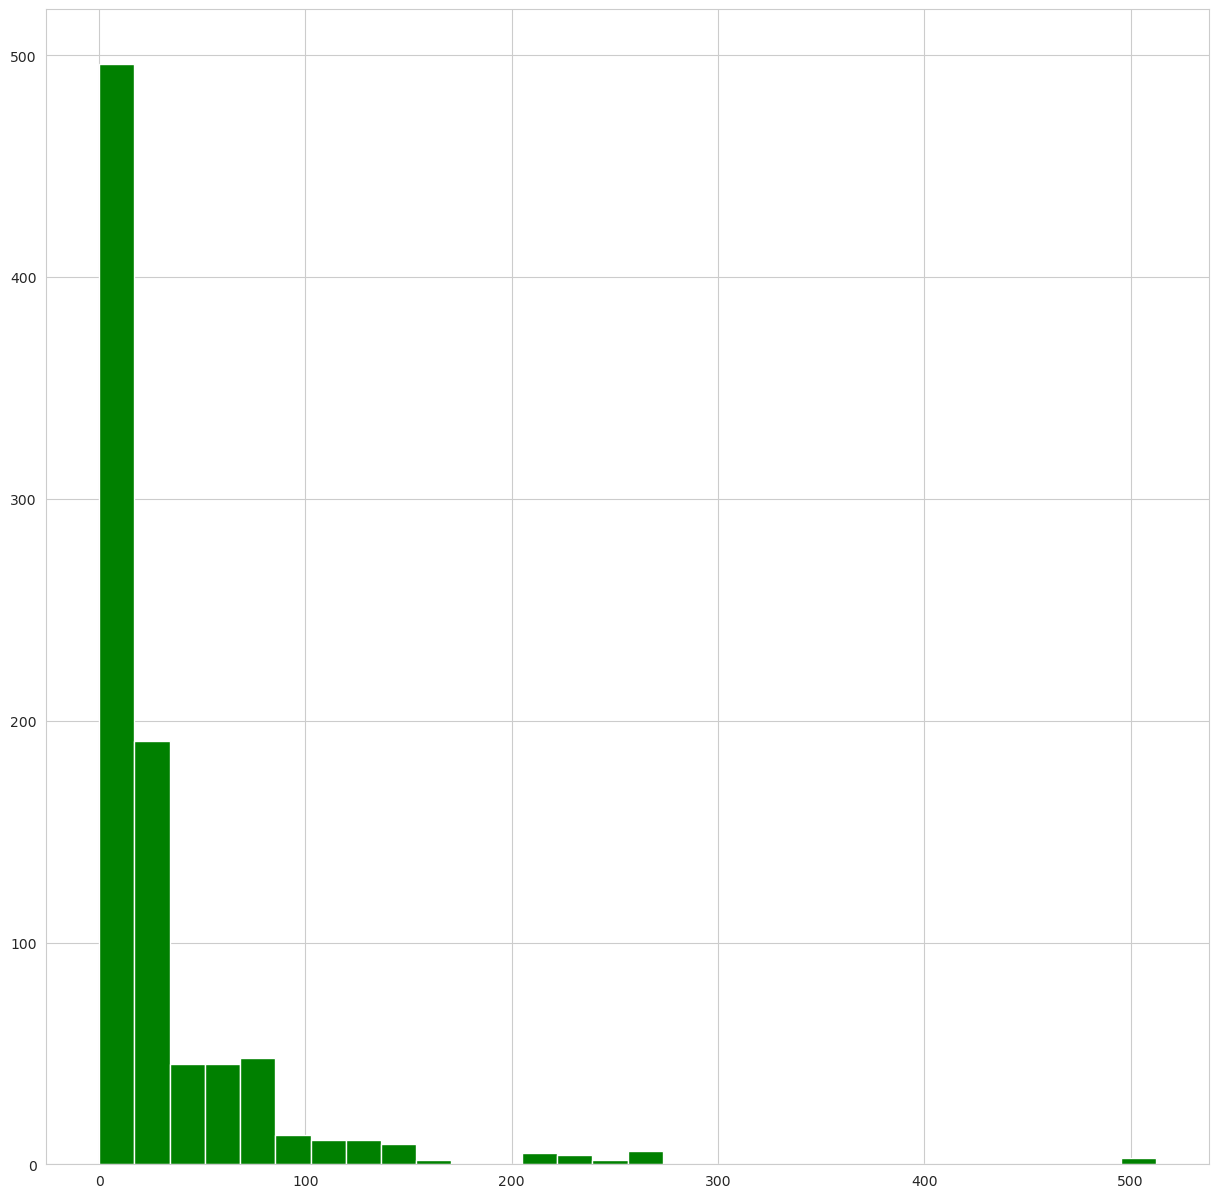

In [26]:
df1['Fare'].hist(color='green', bins=30, figsize=(15,15))

/home/onscript/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/onscript/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(


<Axes: xlabel='Fare', ylabel='Count'>

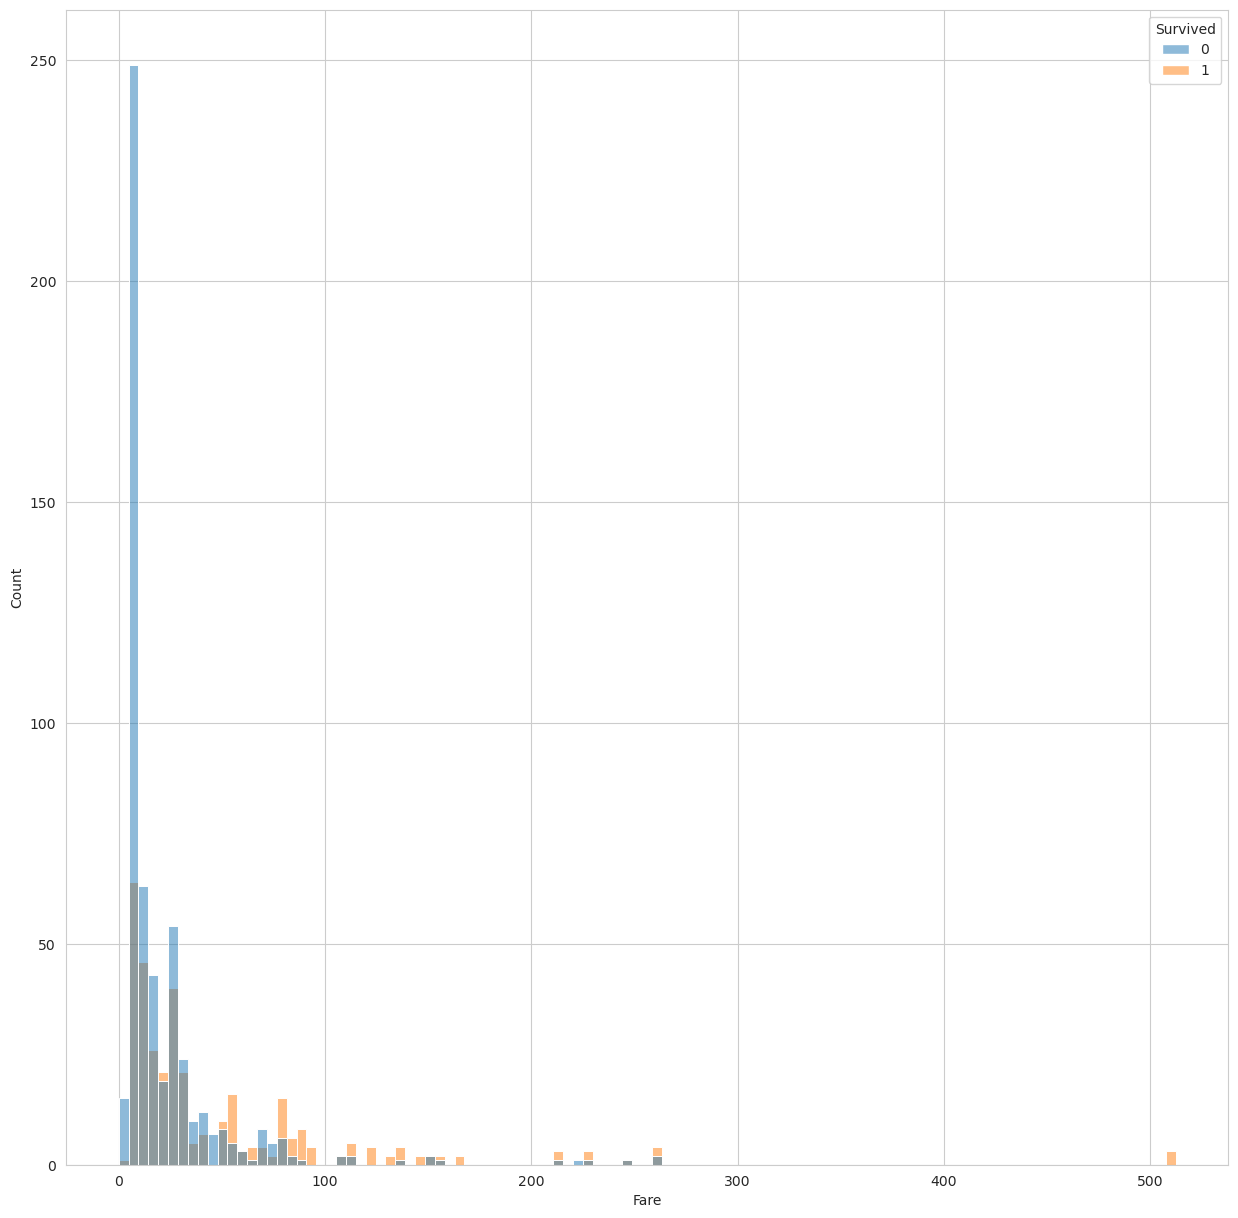

In [27]:
plt.figure(figsize=(15,15))
sns.histplot(x='Fare', hue='Survived', data=df1)

<Axes: xlabel='Pclass', ylabel='Age'>

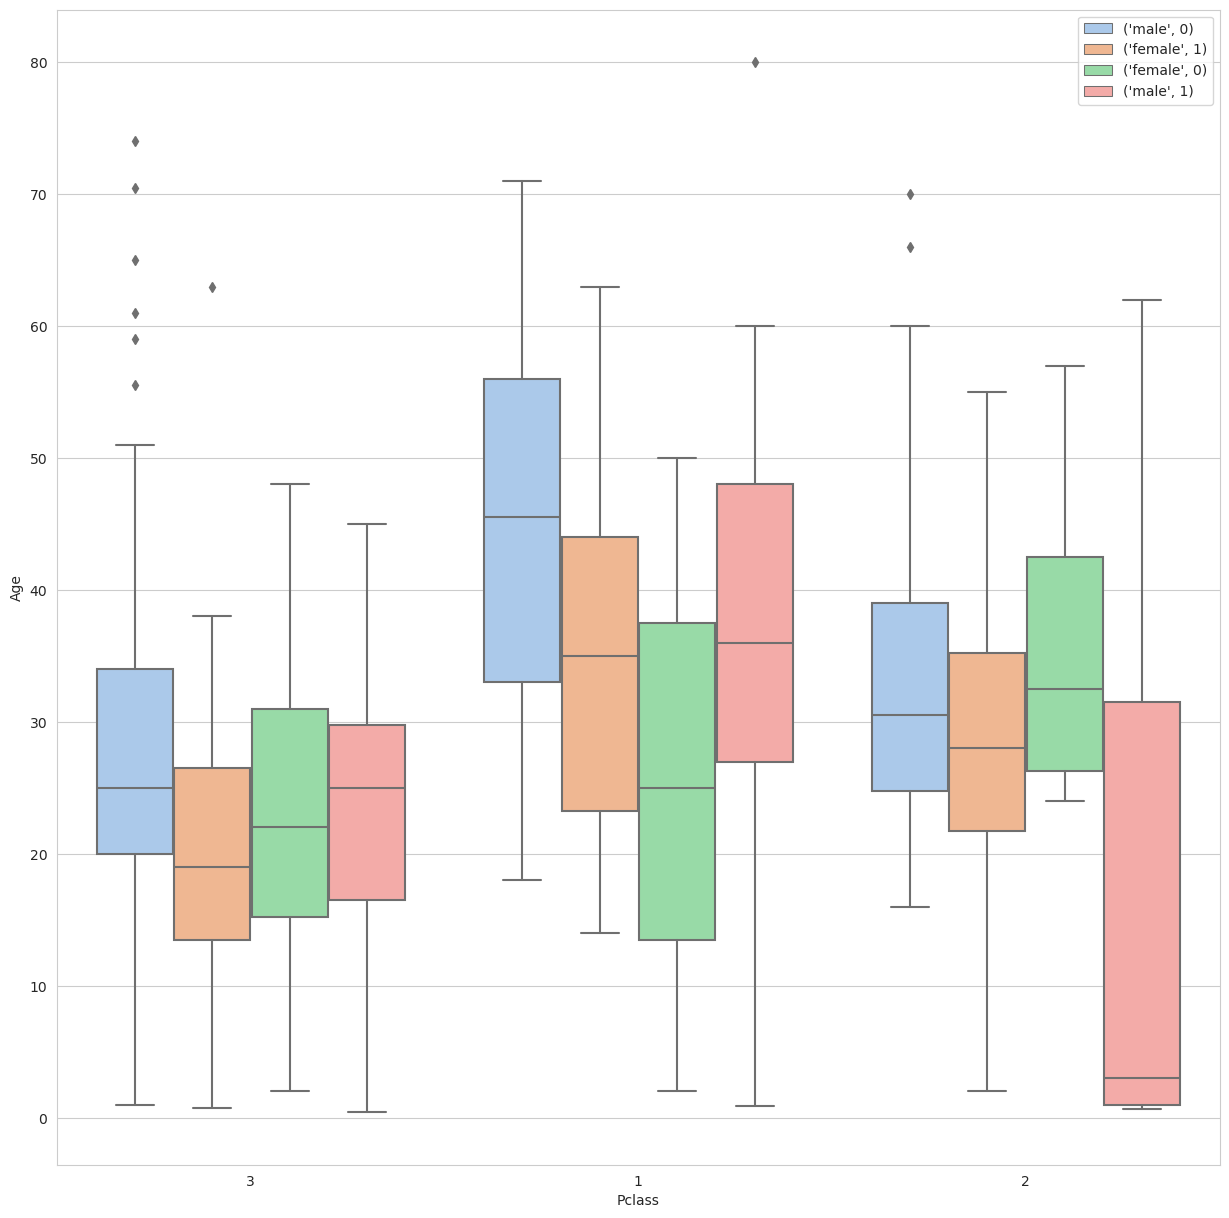

In [28]:
plt.figure(figsize=(15,15))
sns.boxplot(x='Pclass', y='Age', hue=df1[['Sex','Survived']].apply(tuple, axis=1), data=df1, palette='pastel')

#### Filling in Nan value with the mean
`
df1.loc[(df1.Pclass == '1') & (df1.Survived == 0) & (df1.Sex == 'male')].Age.mean()
`

checking for Nan value in a row

`pd.isna(df1.iloc[888])
`

result

```
Survived    False
Pclass      False
Name        False
Sex         False
Age          True
SibSp       False
Parch       False
Fare        False
Embarked    False
Name: 888, dtype: bool

```

In [29]:
df1.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [30]:
# Define conditions for different groups based on Pclass, Survived, and Sex
conditions = [
    (df['Pclass'] == 1) & (df['Survived'] == 0) & (df['Sex'] == 'male'),
    (df['Pclass'] == 1) & (df['Survived'] == 1) & (df['Sex'] == 'male'),
    (df['Pclass'] == 1) & (df['Survived'] == 0) & (df['Sex'] == 'female'),
    (df['Pclass'] == 1) & (df['Survived'] == 1) & (df['Sex'] == 'female'),
    
    (df['Pclass'] == 2) & (df['Survived'] == 0) & (df['Sex'] == 'male'),
    (df['Pclass'] == 2) & (df['Survived'] == 1) & (df['Sex'] == 'male'),
    (df['Pclass'] == 2) & (df['Survived'] == 0) & (df['Sex'] == 'female'),
    (df['Pclass'] == 2) & (df['Survived'] == 1) & (df['Sex'] == 'female'),
    
    (df['Pclass'] == 3) & (df['Survived'] == 0) & (df['Sex'] == 'male'),
    (df['Pclass'] == 3) & (df['Survived'] == 1) & (df['Sex'] == 'male'),
    (df['Pclass'] == 3) & (df['Survived'] == 0) & (df['Sex'] == 'female'),
    (df['Pclass'] == 3) & (df['Survived'] == 1) & (df['Sex'] == 'female'),
]

# Using the 'fillna' method to fill NaN values in the 'Age' column
# The values are filled based on the mean age calculated for each group defined by the conditions
# The mean age is rounded to the nearest integer
# The result is then converted to integer type

df1['Age'] = df1['Age'].fillna(df1.groupby(conditions)['Age'].transform('mean').round())

In [31]:
df1.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [32]:
df1.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S


We still have 2 NaN value, we could fill it with the mean or drop it entirely since and data is too small to contribute to our analysis

In [35]:
df1 = df1.dropna()

In [39]:
df1.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [42]:
df1.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
5,0,3,"Moran, Mr. James",male,27.0,0,0,8.4583,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C


#### Could a person Title influence their survival rate?

Title such as Mrs, Mr, Doc, Miss....

In [79]:
def title_extraction(name):
    titles = [
        'Mr', 'Mrs', 'Miss', 'Rev', 'Master', 'Dr', 'Countess', 'Col', 'Capt', 'Ms', 'Major', 'Don', 'Mme', 'Mlle', 'Jonkheer'
    ]
    for title in titles:
        if title in name:
            return title
        
df1['Title'] = df1['Name'].map(title)

In [80]:
df1.head(1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,tit
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.25,S,Mr,Mr


Checking for Nan value for title not used

In [81]:
df1['Title'].isna().sum()

0

In [82]:
df1.drop('tit')

KeyError: "['tit'] not found in axis"